In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from ruamel.yaml import YAML
import matplotlib.ticker as ticker

import os
import sys 
sys.path.append("../src")
from Fitness.ORCH import Calculate_ORCH


In [2]:
yaml = YAML()
main_path = os.getcwd()
with open("../data/Info_species_fitness.yaml", "r") as f:
    data = yaml.load(f)
Name_Folder = "0D"
flag_output= True

species = list(data.keys())


data_d = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Detailed.csv")
data_r = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Reduced.csv")
data_o = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OptimA.csv")
data_ob = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OptimB.csv")

case = data_d["P_Init"].nunique()*  data_d["T_Init"].nunique()  *  data_d["Phi_Init"].nunique()  *  data_d["Mixt_Init"].nunique() 
lenght= int(data_d.shape[0]/ case)

In [3]:
Err_R, Err_Reduced_Species ,Err_Reduced_Species_Coef = Calculate_ORCH(data_d,data_r,data,main_path,flag_output)
Err_A, Err_OptimA_Species ,Err_OptimA_Species_Coef = Calculate_ORCH(data_d,data_o,data,main_path,flag_output)
Err_B, Err_OptimB_Species ,Err_OptimB_Species_Coef = Calculate_ORCH(data_d,data_ob,data,main_path,flag_output)

Err ORCH = 2.66e+08
Err ORCH = 1.02e+08
Err ORCH = 4.56e+09


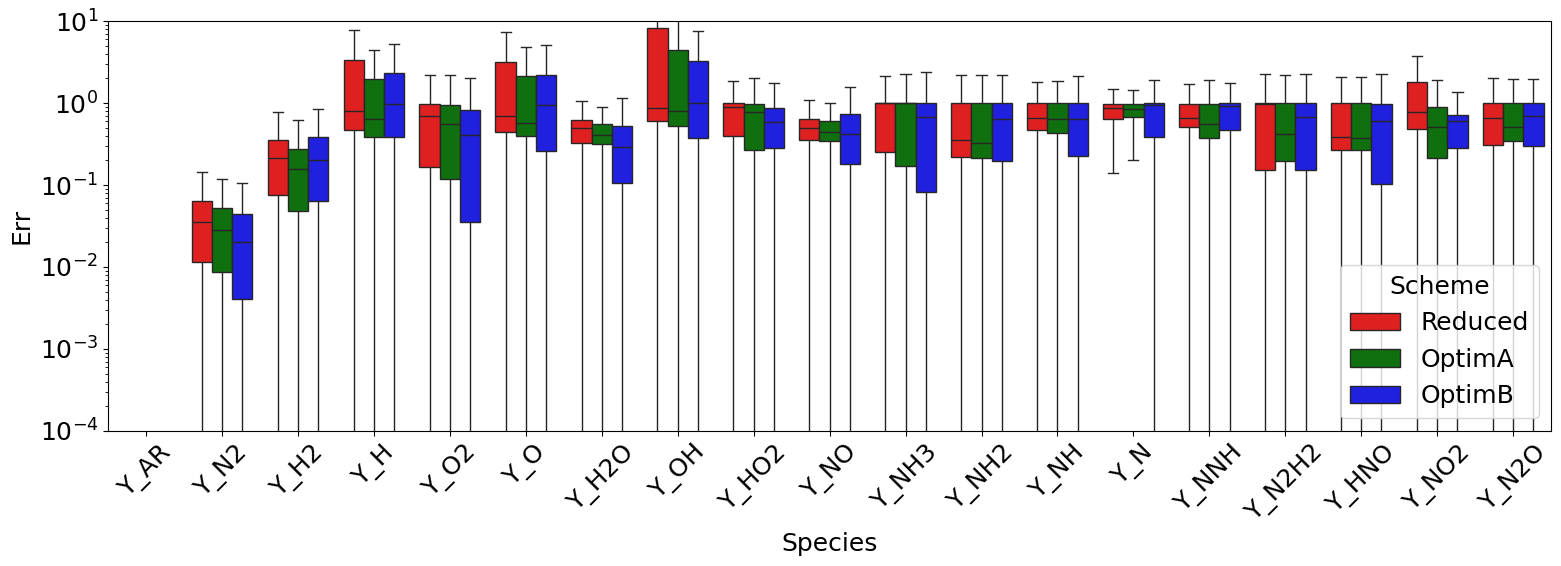

In [5]:
df_reduced = Err_Reduced_Species[species].melt(var_name="Species", value_name="Err")
df_reduced["Scheme"] = "Reduced"

df_optimA = Err_OptimA_Species[species].melt(var_name="Species", value_name="Err")
df_optimA["Scheme"] = "OptimA"

df_optimB = Err_OptimB_Species[species].melt(var_name="Species", value_name="Err")
df_optimB["Scheme"] = "OptimB"

# Fusionner les deux
df_all = pd.concat([df_reduced, df_optimA,df_optimB], ignore_index=True)

palette = {"Reduced": "red", "OptimA": "green","OptimB" : "blue"}

# Tracer
plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 18})
sns.boxplot(data=df_all, x="Species", y="Err", hue="Scheme",  palette=palette,showfliers=False)
plt.yscale("log")
plt.ylim([1e-4, 1e1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ORCH_Err.png")



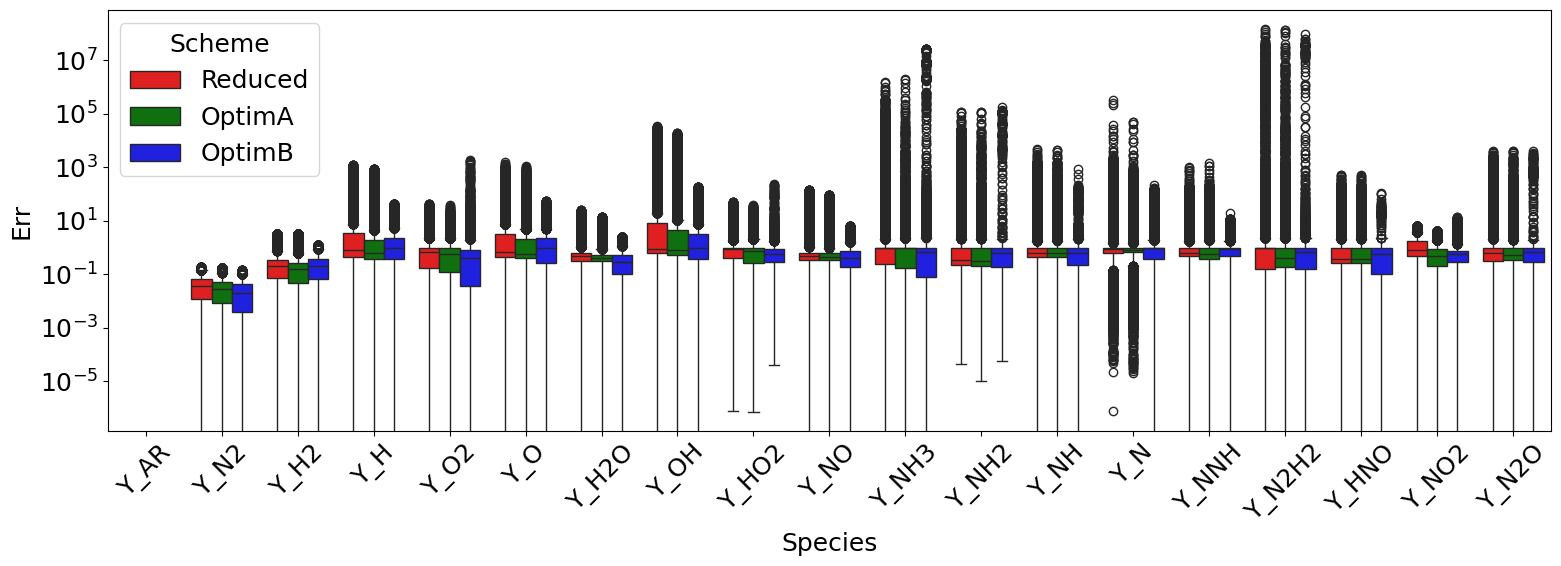

In [6]:
# Tracer
plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 18})
sns.boxplot(data=df_all, x="Species", y="Err", hue="Scheme",  palette=palette,showfliers=True)
plt.yscale("log")
# plt.ylim([1e-4, 1e1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ORCH_Err_showfliers.png")

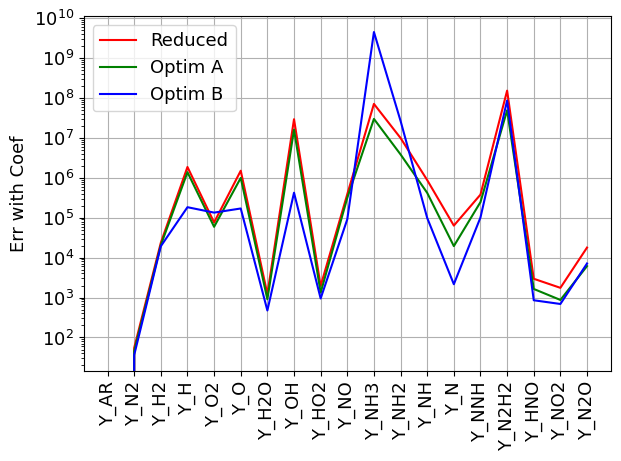

In [7]:
plt.rcParams.update({'font.size': 13})
plt.plot(species, Err_Reduced_Species_Coef, "r-", label="Reduced")
plt.plot(species, Err_OptimA_Species_Coef, "g-", label="Optim A")
plt.plot(species, Err_OptimB_Species_Coef, "b-", label="Optim B")
plt.ylabel("Err with Coef")
plt.xticks(rotation=90)
plt.yscale("log")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("ORCH_Err_Coef.png")


1329.0821228861507
1251.2718103646384
39170.31342839711


/tmp/ipykernel_45389/2462666867.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Laisse de la place à droite pour la légende


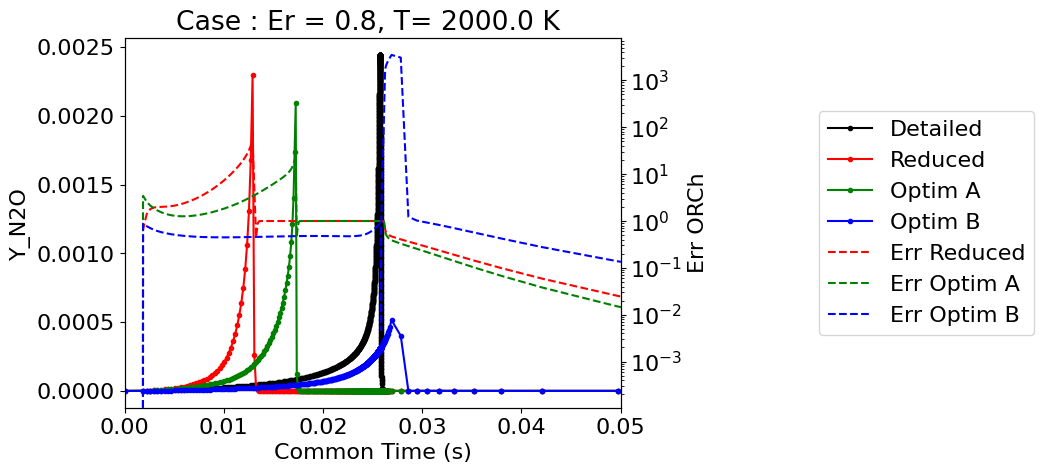

In [42]:
species = "Y_N2O"

selected_case = 20

loc_data_d = data_d.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_r =data_r.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_o =data_o.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_ob = data_ob.iloc[selected_case*lenght:selected_case*lenght+lenght]

loc_err_reduced = Err_Reduced_Species.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_err_optimA =Err_OptimA_Species.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_err_optimB =Err_OptimB_Species.iloc[selected_case*lenght:selected_case*lenght+lenght]
plt.rcParams.update({'font.size': 16})
fig, ax1 = plt.subplots()


# Premier axe pour les concentrations
ax1.plot(loc_data_d["common_grid"], loc_data_d[species], 'k.-', label="Detailed")
ax1.plot(loc_data_d["common_grid"], loc_data_r[species], 'r.-', label="Reduced")
ax1.plot(loc_data_d["common_grid"], loc_data_o[species], 'g.-', label="Optim A")
ax1.plot(loc_data_d["common_grid"], loc_data_ob[species], 'b.-', label="Optim B")
ax1.set_ylabel(f"{species}")
ax1.set_xlabel("Common Time (s)")
ax1.set_xlim([0,0.05])


# Deuxième axe pour l'erreur
ax2 = ax1.twinx()
line1, = ax2.plot(loc_data_d["common_grid"], loc_err_reduced[species], 'r--', label="Err Reduced")
line2, = ax2.plot(loc_data_d["common_grid"], loc_err_optimA[species], 'g--', label="Err Optim A")
line2, = ax2.plot(loc_data_d["common_grid"], loc_err_optimB[species], 'b--', label="Err Optim B")
ax2.set_ylabel("Err ORCh")
ax2.tick_params(axis='y')
ax2.set_yscale("log")
print(np.sum(loc_err_reduced[species]))
print(np.sum(loc_err_optimA[species]))
print(np.sum(loc_err_optimB[species]))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2,
           loc='center left', bbox_to_anchor=(1.4, 0.5), borderaxespad=0.)

plt.title(f"Case : Er = {loc_data_d['Phi_Init'].unique()[0]}, T= {loc_data_d['T_Init'].unique()[0]} K ")


plt.tight_layout(rect=[0, 0, 0.85, 1])  # Laisse de la place à droite pour la légende
plt.savefig(f"ORCH_Err_{species}.png", bbox_inches='tight')

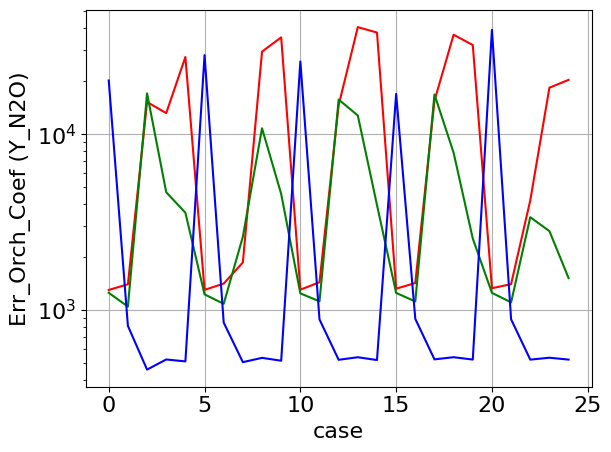

In [41]:

S = "Y_N2O"
R = pd.Series(Err_Reduced_Species[S].to_numpy().reshape(-1, 1000).sum(axis=1))
A = pd.Series(Err_OptimA_Species[S].to_numpy().reshape(-1, 1000).sum(axis=1))
B = pd.Series(Err_OptimB_Species[S].to_numpy().reshape(-1, 1000).sum(axis=1))

plt.figure()
plt.plot(R, "r", label="Reduced")
plt.plot(A, "g", label="Optim A")
plt.plot(B, "b", label="Optim B")

# Légende à droite
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.grid()
plt.yscale("log")
plt.xlabel("case")
plt.ylabel(f"Err_Orch_Coef ({S})")
plt.tight_layout()  # Ajuste l'espace pour la légende
plt.savefig(f"ORCH_Err_case_{S}.png")


In [10]:
Tot_R = pd.DataFrame(0.0, index=range(case), columns=species)
Tot_A = pd.DataFrame(0.0, index=range(case), columns=species)
Tot_B = pd.DataFrame(0.0, index=range(case), columns=species)

for c in range(case): 
    loc_err_reduced = Err_Reduced_Species.iloc[c*lenght:c*lenght+lenght]
    loc_err_optimA = Err_OptimA_Species.iloc[c*lenght:c*lenght+lenght]
    loc_err_optimB = Err_OptimB_Species.iloc[c*lenght:c*lenght+lenght]
    
    for s in species: 
        k = data[s]["coefficient"] if data[s]["coefficient"] is not None else 0.05
        
        Tot_R.at[c, s] = k * loc_err_reduced[s].sum()
        Tot_A.at[c, s] = k * loc_err_optimA[s].sum()
        Tot_B.at[c, s] = k * loc_err_optimB[s].sum()


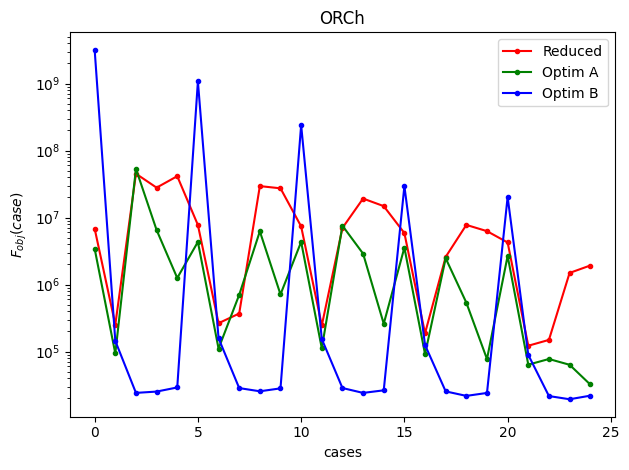

In [26]:
plt.plot(Tot_R.sum(axis=1),"r.-",label="Reduced")
plt.plot(Tot_A.sum(axis=1),"g.-",label="Optim A")
plt.plot(Tot_B.sum(axis=1),"b.-",label="Optim B")
plt.ylabel(r"$F_{obj}(case)$")
plt.xlabel("cases")
plt.yscale("log")
plt.legend()
plt.title("ORCh")
plt.tight_layout()
plt.savefig("ORCH_Err_fit_case.png")